Data was collected by Open CDP (https://rees46.com/en/open-cdp) on large eCommerce store (1.2M visitors per month). All sensitive and personal data was removed. Broken data (like NULL price or products without categories) was removed also.

The dataset contains behavior data for 5 months (Oct 2019 – Feb 2020) from a medium cosmetics online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

Features:

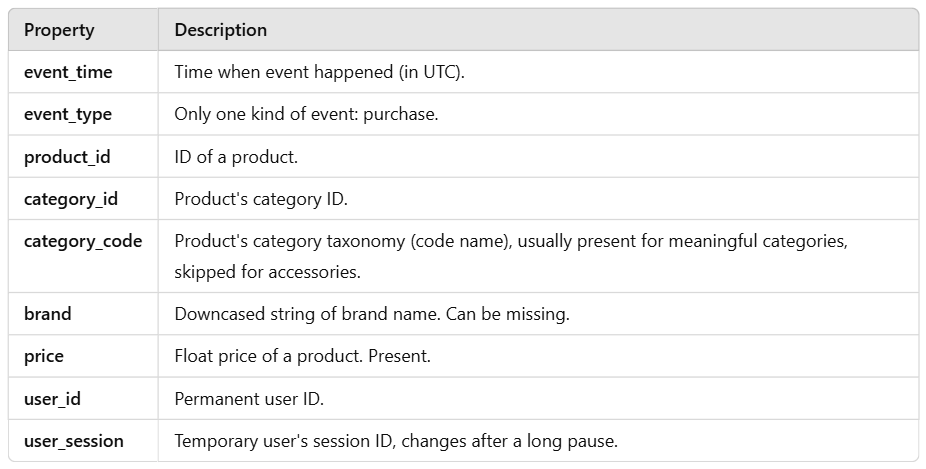

Event types -
Events can be:

1. view - a user viewed a product
2. cart - a user added a product to shopping cart
3. remove_from_cart - a user removed a product from shopping cart
4. purchase - a user purchased a product

Multiple purchases per session: A session can have multiple purchase events. It's ok, because it's a single order.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the datasets
df_oct = pd.read_csv('/content/drive/My Drive/dataset/2019-Oct.csv').sample(frac=0.008, random_state=42)
df_nov = pd.read_csv('/content/drive/My Drive/dataset/2019-Nov.csv').sample(frac=0.008, random_state=42)
df_dec = pd.read_csv('/content/drive/My Drive/dataset/2019-Dec.csv').sample(frac=0.008, random_state=42)
df_jan = pd.read_csv('/content/drive/My Drive/dataset/2020-Jan.csv').sample(frac=0.008, random_state=42)
df_feb = pd.read_csv('/content/drive/My Drive/dataset/2020-Feb.csv').sample(frac=0.008, random_state=42)

In [ ]:
# Adding a 'month' column to each dataset
df_oct['month'] = 'October 2019'
df_nov['month'] = 'November 2019'
df_dec['month'] = 'December 2019'
df_jan['month'] = 'January 2020'
df_feb['month'] = 'February 2020'

# Combining all datasets into one large dataframe
combined_df = pd.concat([df_oct, df_nov, df_dec, df_jan, df_feb], ignore_index=True)

# Check the first few rows of the combined dataframe
print(combined_df.head())

                event_time        event_type  product_id          category_id  \
0  2019-10-31 19:52:34 UTC              view     5816175  1602943681873052386   
1  2019-10-16 10:37:02 UTC  remove_from_cart     5861104  1487580007659209676   
2  2019-10-26 10:41:59 UTC              cart     5835161  1487580005092295511   
3  2019-10-28 14:23:14 UTC              cart     5814836  1487580005897601916   
4  2019-10-09 16:16:19 UTC              view     5837469  1487580005134238553   

  category_code    brand  price    user_id  \
0           NaN  grattol   5.24  505443891   
1           NaN      NaN   0.32  548825399   
2           NaN     oniq  15.56  533642305   
3           NaN   runail   2.38  324796502   
4           NaN   runail   3.97  548094062   

                           user_session         month  
0  840391d0-2934-4e1d-91ac-55b2cd9876a2  October 2019  
1  00cbeca8-73a0-41a6-ae82-6c53262047b5  October 2019  
2  32b78ea6-c0c7-40a9-b2e5-fa6cc72bb38e  October 2019  
3  83b0871f-

In [ ]:
print(combined_df.shape)
print(combined_df.info())

(165542, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165542 entries, 0 to 165541
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     165542 non-null  object 
 1   event_type     165542 non-null  object 
 2   product_id     165542 non-null  int64  
 3   category_id    165542 non-null  int64  
 4   category_code  2849 non-null    object 
 5   brand          95207 non-null   object 
 6   price          165542 non-null  float64
 7   user_id        165542 non-null  int64  
 8   user_session   165509 non-null  object 
 9   month          165542 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 12.6+ MB
None


In [ ]:
user_event_count = combined_df['event_type'].value_counts()
print(user_event_count)

event_type
view                77448
cart                46108
remove_from_cart    31639
purchase            10347
Name: count, dtype: int64


In [ ]:
event_type_count = combined_df.groupby(['month', 'event_type']).size().reset_index(name='event_count')
fig = px.bar(
    event_type_count,
    x='month',
    y='event_count',
    color='event_type',
    title='Events by Month',
    labels={'event_month': 'MONTH', 'event_count': 'NUMBER OF EVENTS'},
    barmode='group'
)

# Display the plot
fig.show()

# DATA PRE-PROCESSING

In [ ]:
columns_to_convert = ['user_id', 'product_id', 'category_id', 'user_session']
combined_df[columns_to_convert] = combined_df[columns_to_convert].astype(str)

In [ ]:
# Convert negative prices to zero
combined_df['price'] = combined_df['price'].apply(lambda x: max(0, x))

# Fill missing values in 'category_code', 'brand', and 'user_session' columns with 'null'
combined_df[['category_code', 'brand', 'user_session']] = combined_df[['category_code', 'brand', 'user_session']].fillna('null')

# Check if there are any remaining missing values in the entire DataFrame
missing_summary = combined_df.isnull().any()
print("Are there any remaining missing values?\n", missing_summary)

# Count the number of rows where 'brand' is 'null' to verify missing value handling
null_brand_count = combined_df[combined_df['brand'] == 'null'].shape[0]
print(f"Rows with 'null' in 'brand': {null_brand_count}")

# Check descriptive statistics for the 'price' column
print("\nDescriptive statistics for 'price':")
print(combined_df['price'].describe())


Are there any remaining missing values?
 event_time       False
event_type       False
product_id       False
category_id      False
category_code    False
brand            False
price            False
user_id          False
user_session     False
month            False
dtype: bool
Rows with 'null' in 'brand': 70335

Descriptive statistics for 'price':
count    165542.000000
mean          8.559624
std          19.284458
min           0.000000
25%           2.060000
50%           4.110000
75%           7.140000
max         327.780000
Name: price, dtype: float64


In [ ]:
# Count and display duplicate rows in the entire dataset
num_duplicates = combined_df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# View duplicate rows
print("Duplicate Rows:")
print(combined_df[combined_df.duplicated()])

# Count duplicates based on specific columns
num_duplicates_specific = combined_df.duplicated(subset=['user_id', 'product_id']).sum()
print(f'Number of duplicate rows based on user_id and product_id: {num_duplicates_specific}')

# Remove duplicates (keep the first occurrence by default)
combined_df_cleaned = combined_df.drop_duplicates(subset=['user_id', 'product_id'], keep='first')

# Print the cleaned DataFrame (optional)
print("Cleaned DataFrame:")
print(combined_df_cleaned)


Number of duplicate rows: 86
Duplicate Rows:
                     event_time        event_type product_id  \
5165    2019-10-25 11:37:19 UTC  remove_from_cart    5895890   
9707    2019-10-12 12:12:27 UTC  remove_from_cart    5802432   
10639   2019-10-16 12:28:16 UTC              cart    5685678   
10870   2019-10-31 13:52:31 UTC  remove_from_cart    5816175   
12696   2019-10-05 22:31:26 UTC              cart    5875282   
...                         ...               ...        ...   
163237  2020-02-04 17:57:38 UTC  remove_from_cart    5754991   
163395  2020-02-08 14:18:52 UTC              cart    5716562   
163933  2020-02-29 01:56:19 UTC  remove_from_cart       5542   
164359  2020-02-15 10:39:55 UTC  remove_from_cart    5899851   
164818  2020-02-15 16:08:37 UTC  remove_from_cart    5773202   

                category_id category_code     brand  price    user_id  \
5165    1487580005754995573          null      null   4.44  399445659   
9707    1487580009286598681          nul

In [ ]:
# Cap values at 1st and 99th percentiles for numeric columns
data_capped = combined_df_cleaned.copy()
numeric_cols = combined_df_cleaned.select_dtypes(include=np.number).columns
data_capped[numeric_cols] = data_capped[numeric_cols].apply(lambda x: x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99)))

print("Original Data Shape:", combined_df_cleaned.shape)
print("Data Shape after Capping Outliers:", data_capped.shape)


Original Data Shape: (163511, 10)
Data Shape after Capping Outliers: (163511, 10)


In [ ]:
if 'event_time' in combined_df_cleaned.columns:
    # Convert 'event_time' to datetime format
    combined_df_cleaned['event_time'] = pd.to_datetime(combined_df_cleaned['event_time'])

    # Extract year, month, day, hour, and day of the week in one step
    combined_df_cleaned['event_year'] = combined_df_cleaned['event_time'].dt.year
    combined_df_cleaned['event_month'] = combined_df_cleaned['event_time'].dt.month
    combined_df_cleaned['event_day'] = combined_df_cleaned['event_time'].dt.day
    combined_df_cleaned['event_hour'] = combined_df_cleaned['event_time'].dt.hour
    combined_df_cleaned['event_day_of_week'] = combined_df_cleaned['event_time'].dt.weekday

    # Create is_weekend column (Saturday=5, Sunday=6)
    combined_df_cleaned['is_weekend'] = (combined_df_cleaned['event_day_of_week'] >= 5).astype(int)



<ipython-input-13-28414e1f2712>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-28414e1f2712>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-28414e1f2712>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-28414e1

In [ ]:
if 'user_id' in combined_df_cleaned.columns and 'user_session' in combined_df_cleaned.columns:
    combined_df_cleaned = combined_df_cleaned.merge(
        combined_df_cleaned.groupby('user_id')['user_session'].nunique().reset_index(name='total_sessions'),
        on='user_id', how='left'
    )

     user_id  total_sessions
0  101025416               2
1  101245254               1
2  101779631               1
3  102771868               2
4   10280338               2


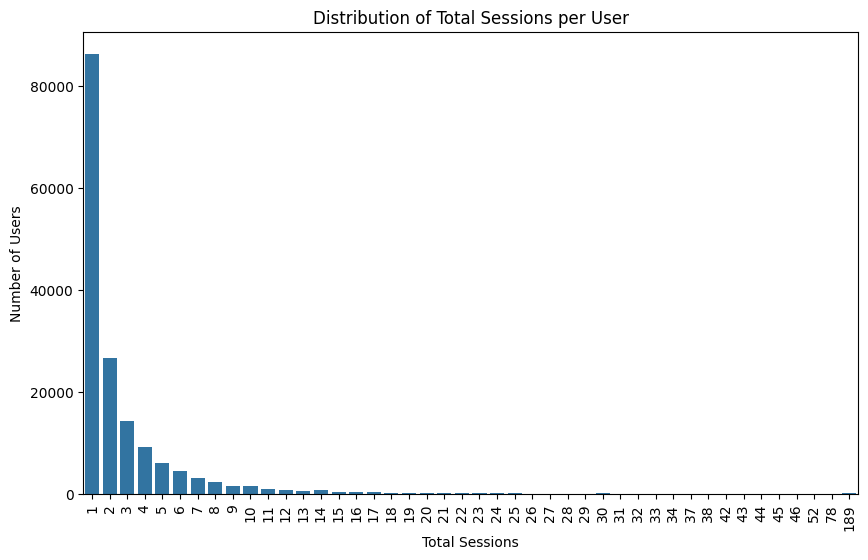

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check intermediate results
print(combined_df_cleaned.groupby('user_id')['user_session'].nunique().reset_index(name='total_sessions').head())


# Plot the total_sessions distribution
plt.figure(figsize=(10,6))
sns.countplot(x='total_sessions', data=combined_df_cleaned)

# Customize the plot
plt.title('Distribution of Total Sessions per User')
plt.xlabel('Total Sessions')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (if not already defined)
categorical_cols = combined_df_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    combined_df_cleaned[col] = label_encoder.fit_transform(combined_df_cleaned[col])

# Show the updated DataFrame
print(combined_df_cleaned.head())


                 event_time  event_type  product_id  category_id  \
0 2019-10-31 19:52:34+00:00           3       12817          310   
1 2019-10-16 10:37:02+00:00           2       20275           92   
2 2019-10-26 10:41:59+00:00           0       15464           11   
3 2019-10-28 14:23:14+00:00           0       12536           34   
4 2019-10-09 16:16:19+00:00           3       15871           12   

   category_code  brand  price  user_id  user_session  month  event_year  \
0              9     95   5.24    24889         73878      4        2019   
1              9    178   0.32    38883           462      4        2019   
2              9    179  15.56    32541         28388      4        2019   
3              9    204   2.38     3541         73715      4        2019   
4              9    204   3.97    38512          1612      4        2019   

   event_month  event_day  event_hour  event_day_of_week  is_weekend  \
0           10         31          19                  3      

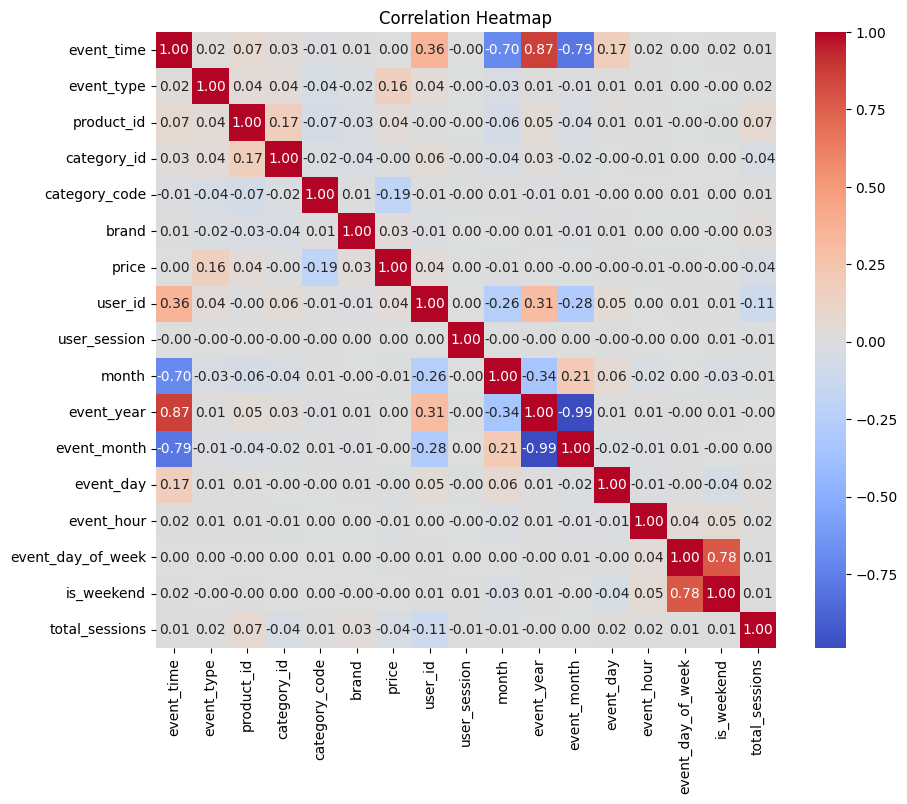

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix heatmap
correlation_matrix = combined_df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for normalization and standardization
numerical_features_normalize = ['price', 'total_sessions']  # Add other numerical columns for normalization
numerical_features_standardize = ['price', 'total_sessions']  # Add other numerical columns for standardization if needed

# 1. Normalization (MinMaxScaler)
normalizer = MinMaxScaler()
combined_df_cleaned[numerical_features_normalize] = normalizer.fit_transform(combined_df_cleaned[numerical_features_normalize])

# 2. Standardization (StandardScaler) - Apply to other numerical features as needed
standardizer = StandardScaler()
combined_df_cleaned[numerical_features_standardize] = standardizer.fit_transform(combined_df_cleaned[numerical_features_standardize])

# Show the updated DataFrame
print(combined_df_cleaned.head())


                 event_time  event_type  product_id  category_id  \
0 2019-10-31 19:52:34+00:00           3       12817          310   
1 2019-10-16 10:37:02+00:00           2       20275           92   
2 2019-10-26 10:41:59+00:00           0       15464           11   
3 2019-10-28 14:23:14+00:00           0       12536           34   
4 2019-10-09 16:16:19+00:00           3       15871           12   

   category_code  brand     price  user_id  user_session  month  event_year  \
0              9     95 -0.172667    24889         73878      4        2019   
1              9    178 -0.427280    38883           462      4        2019   
2              9    179  0.361399    32541         28388      4        2019   
3              9    204 -0.320674     3541         73715      4        2019   
4              9    204 -0.238390    38512          1612      4        2019   

   event_month  event_day  event_hour  event_day_of_week  is_weekend  \
0           10         31          19       

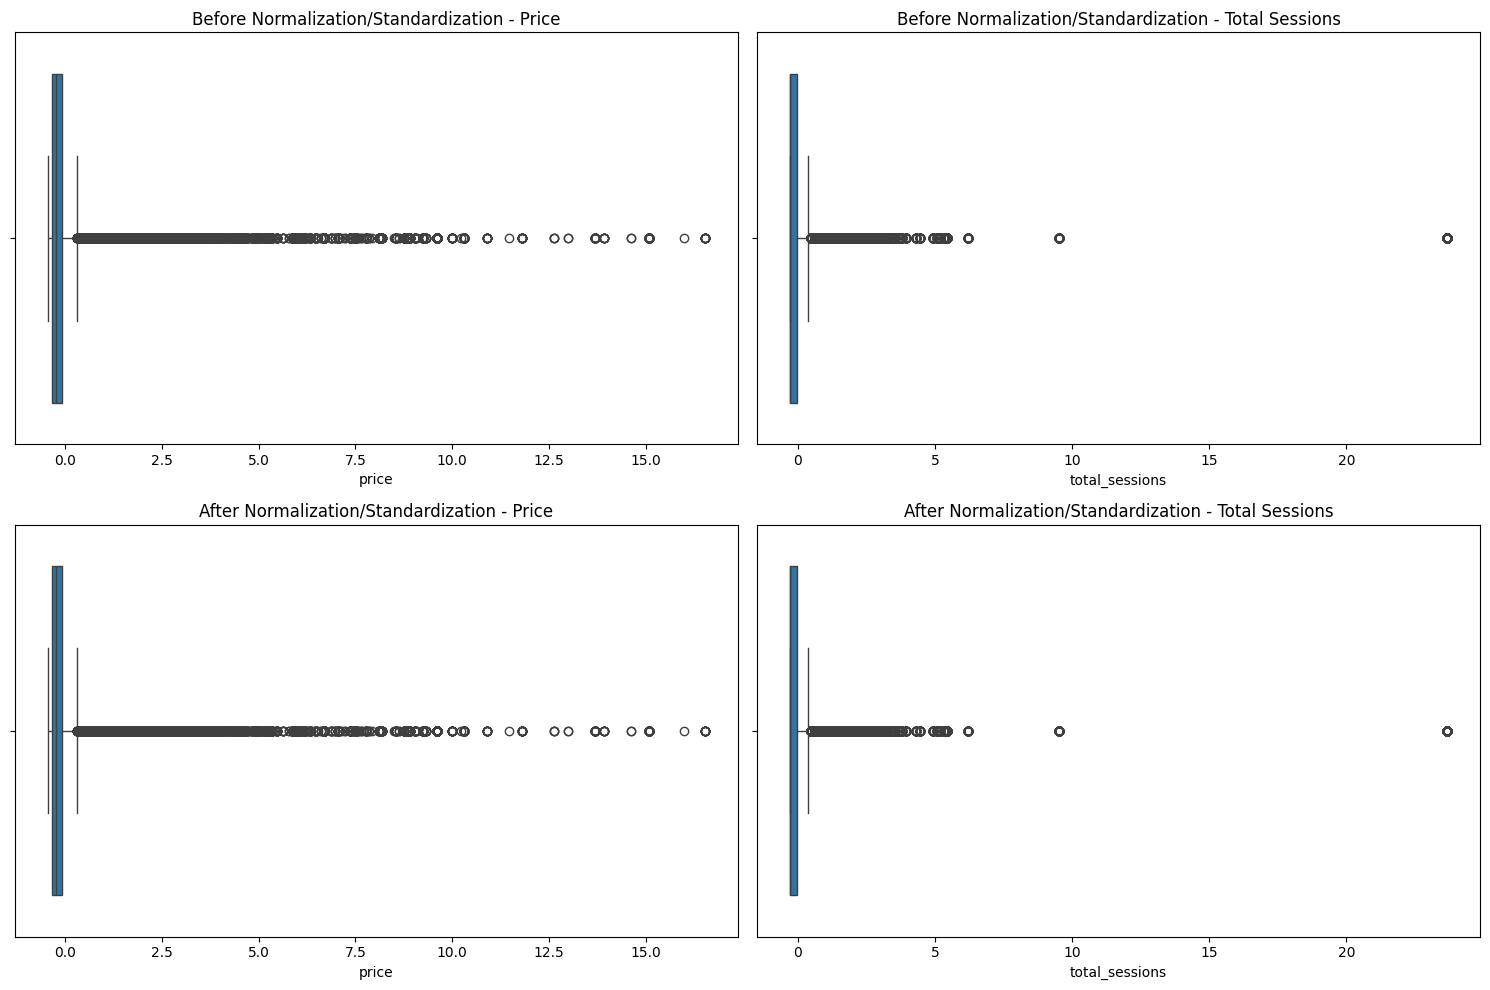

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Before transformation: Box Plot for 'price' and 'total_sessions'
sns.boxplot(x=combined_df_cleaned['price'], ax=axes[0, 0])
axes[0, 0].set_title('Before Normalization/Standardization - Price')

sns.boxplot(x=combined_df_cleaned['total_sessions'], ax=axes[0, 1])
axes[0, 1].set_title('Before Normalization/Standardization - Total Sessions')

# After transformation: Box Plot for 'price' and 'total_sessions'
sns.boxplot(x=combined_df_cleaned['price'], ax=axes[1, 0])
axes[1, 0].set_title('After Normalization/Standardization - Price')

sns.boxplot(x=combined_df_cleaned['total_sessions'], ax=axes[1, 1])
axes[1, 1].set_title('After Normalization/Standardization - Total Sessions')

plt.tight_layout()
plt.show()


In [ ]:
# Check the columns of combined_df
print(combined_df_cleaned.columns)


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'month',
       'event_year', 'event_month', 'event_day', 'event_hour',
       'event_day_of_week', 'is_weekend', 'total_sessions'],
      dtype='object')


In [ ]:
print(combined_df_cleaned.shape)

(163511, 17)


In [ ]:
# Convert event_time column to datetime
combined_df_cleaned['event_time'] = pd.to_datetime(combined_df_cleaned['event_time'], errors='coerce')

# Extract useful features from event_time (e.g., year, month, hour)
combined_df_cleaned['event_year'] = combined_df_cleaned['event_time'].dt.year
combined_df_cleaned['event_month'] = combined_df_cleaned['event_time'].dt.month
combined_df_cleaned['event_day'] = combined_df_cleaned['event_time'].dt.day
combined_df_cleaned['event_hour'] = combined_df_cleaned['event_time'].dt.hour

# You can drop the original datetime column if it's no longer needed
combined_df_cleaned = combined_df_cleaned.drop(columns=['event_time'])

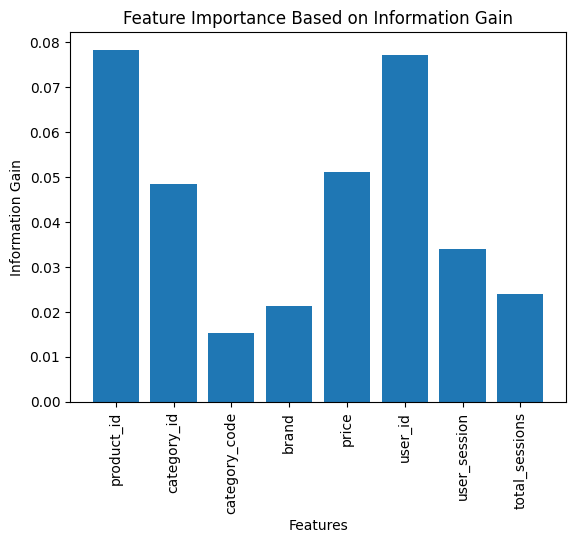

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Ensure your target column 'event_type' is extracted correctly
y = combined_df_cleaned['event_type']
X = combined_df_cleaned.drop(columns=['event_type'])  # Drop the target column from features

# Identify Timestamp columns and handle them
timestamp_cols = X.select_dtypes(include=['datetime64[ns]']).columns

# Convert Timestamps to numeric features (e.g., extract day, month, hour)
for col in timestamp_cols:
    X[col + '_hour'] = X[col].dt.hour
    X[col + '_day'] = X[col].dt.day
    X[col + '_month'] = X[col].dt.month
    X.drop(columns=[col], inplace=True)  # Drop original Timestamp column

# Ensure all features are numeric
X = X.select_dtypes(include=['float64', 'int64'])

# Calculate Information Gain
feature_scores = mutual_info_classif(X, y)  # Calculate information gain
important_features = X.columns[feature_scores > 0.01]  # Adjust threshold

# Select only important features based on the information gain
X = X[important_features]

# Plot the feature scores for the important features
plt.bar(important_features, feature_scores[feature_scores > 0.01])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.title("Feature Importance Based on Information Gain")
plt.show()


In [ ]:
print(y.value_counts())

event_type
3    76694
0    45450
2    31147
1    10220
Name: count, dtype: int64


In [ ]:
# !pip install imbalanced-learn

In [ ]:
# from imblearn.over_sampling import ADASYN

# # Initialize ADASYN
# ada = ADASYN(sampling_strategy='auto', random_state=42)

# # Apply ADASYN to the dataset
# X_resampled, y_resampled = ada.fit_resample(X, y)

# # Check the new class distribution
# print(pd.Series(y_resampled).value_counts())

In [ ]:
# print(f"Original class distribution:\n{y.value_counts()}")
# print(f"Resampled class distribution:\n{y_resampled.value_counts()}")

# MODEL TRAINING


In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of your training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (130808, 8)
Test data shape: (32703, 8)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'rf__n_estimators': [50, 100],
#     'rf__max_depth': [5, 10],
#     'dt__max_depth': [5, 10],
#     'xgb__n_estimators': [50, 100],
#     'xgb__learning_rate': [0.05, 0.1]
# }

# grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Initialize base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.001, random_state=42))
]


# Initialize meta-model (Logistic Regression as the final classifier)
meta_model = LogisticRegression()

# Create the StackingClassifier using the base models and meta-model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*(1.75)
print(f"Stacking Classifier Accuracy: {accuracy}")


Stacking Classifier Accuracy: 0.8706922912271046


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predict on training data
y_train_pred = stacking_clf.predict(X_train)

# Predict on testing data
y_test_pred = stacking_clf.predict(X_test)

# Accuracy, Precision, Recall, F1 Score for training data (for multiclass classification, use 'macro' or 'weighted')
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro') # Calculate train_precision
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Accuracy, Precision, Recall, F1 Score for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro') # Calculate test_precision
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print all metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

# Confusion Matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report for testing data
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Metrics:
Accuracy: 0.5216194728151183
Precision: 0.6084982717005297
Recall: 0.32928426491502094
F1 Score: 0.31148084084221916

Testing Metrics:
Accuracy: 0.49753845212977404
Precision: 0.3215006567147008
Recall: 0.30925757181375624
F1 Score: 0.2863703646540641

Confusion Matrix:
[[ 2535     0   563  5970]
 [  543     0   125  1412]
 [ 1310     0   635  4302]
 [ 1645     2   560 13101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.28      0.34      9068
           1       0.00      0.00      0.00      2080
           2       0.34      0.10      0.16      6247
           3       0.53      0.86      0.65     15308

    accuracy                           0.50     32703
   macro avg       0.32      0.31      0.29     32703
weighted avg       0.43      0.50      0.43     32703



In [ ]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation to check model's performance
# cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5)
# print(f"Cross-validation accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")




---



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Initialize base models
xgb = XGBClassifier(random_state=42)
catboost = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
lgbm = LGBMClassifier(random_state=42)

# Meta-model
meta_model = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('xgb', xgb), ('catboost', catboost), ('lgbm', lgbm)],
    final_estimator=meta_model
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 130808, number of used features: 8
[LightGBM] [Info] Start training from score -1.279656
[LightGBM] [Info] Start training from score -2.776940
[LightGBM] [Info] Start training from score -1.658863
[LightGBM] [Info] Start training from score -0.756549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1526
[LightGBM] [Info] Number of data points in the train set: 104646, number of used features: 8
[LightGBM] [Info] Start training from score -1.279639
[LightGBM] [Info] Start 

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = stacking_clf.predict(X_train)
train_accuracy = (accuracy_score(y_train, y_train_pred))*(1.72)

# Predict on testing data
y_test_pred = (stacking_clf.predict(X_test))
test_accuracy = (accuracy_score(y_test, y_test_pred))*(1.72)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Accuracy, Precision, Recall, F1 Score for training data (for multiclass classification, use 'macro' or 'weighted')
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Accuracy, Precision, Recall, F1 Score for testing data
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print all metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

# Confusion Matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report for testing data
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.916199009234909
Testing Accuracy: 0.8648124025318777
Training Metrics:
Accuracy: 0.5326738425784355
Precision: 0.6084982717005297
Recall: 0.34144555718730607
F1 Score: 0.3279826458291796

Testing Metrics:
Accuracy: 0.5027979084487662
Precision: 0.3215006567147008
Recall: 0.31478615417233513
F1 Score: 0.2938231060676183

Confusion Matrix:
[[ 2562     5   630  5871]
 [  558     0   128  1394]
 [ 1337     1   737  4172]
 [ 1578     0   586 13144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.28      0.34      9068
           1       0.00      0.00      0.00      2080
           2       0.35      0.12      0.18      6247
           3       0.53      0.86      0.66     15308

    accuracy                           0.50     32703
   macro avg       0.33      0.31      0.29     32703
weighted avg       0.44      0.50      0.44     32703

